Convergence Criteria: 50 iterations or minimal change in cost function
Final Cost: 1.1947898109836577e-06
Model Parameters (theta): [0.9966201 0.0013402]


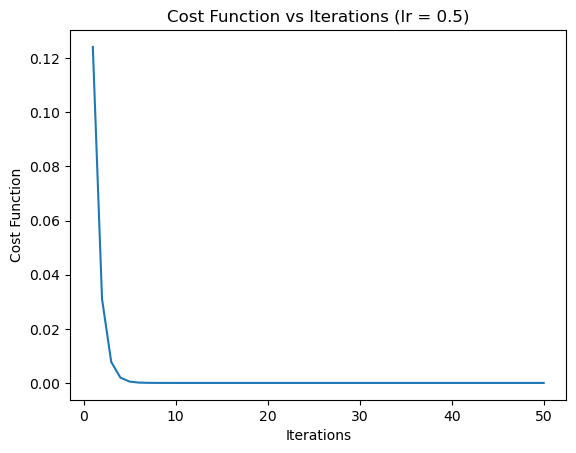

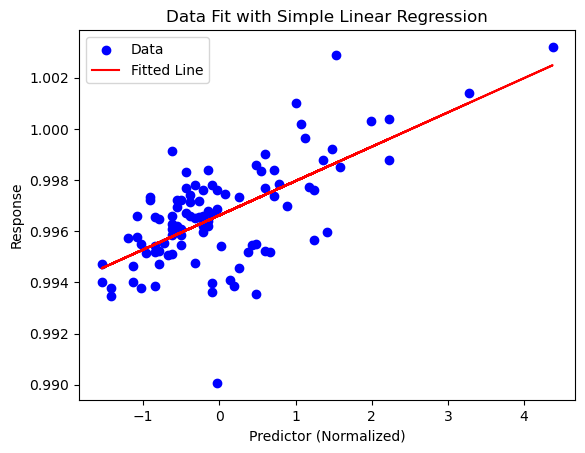

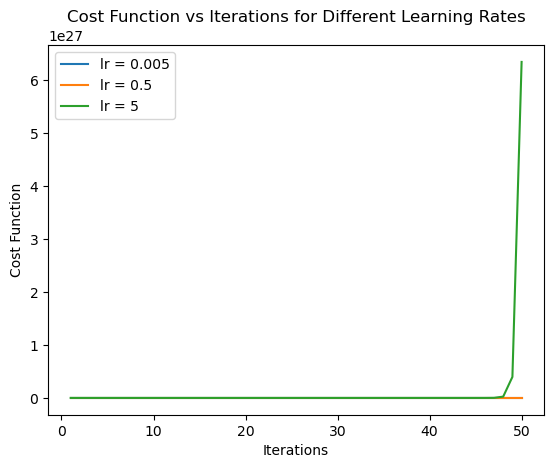

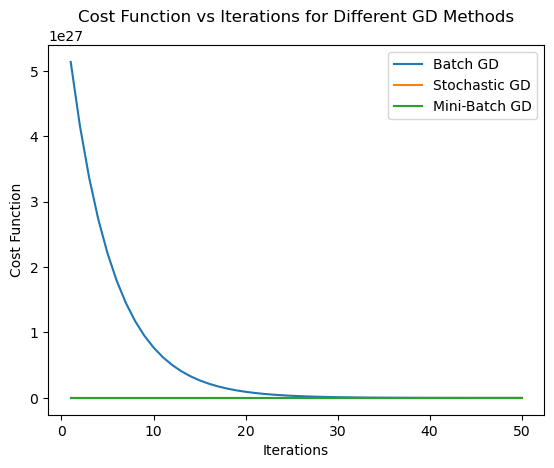

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.loadtxt(r'C:\Users\KIIT\Downloads\linearX.csv')
y = np.loadtxt(r'C:\Users\KIIT\Downloads\linearY.csv')
x = (x - np.mean(x)) / np.std(x)
X = np.c_[np.ones(x.shape[0]), x]  
theta = np.zeros(2)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors**2)
    return cost
def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= lr * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
lr = 0.5
iterations = 50
theta_final, cost_history = gradient_descent(X, y, theta, lr, iterations)
convergence_criteria = "50 iterations or minimal change in cost function"
final_cost = cost_history[-1]
print("Convergence Criteria:", convergence_criteria)
print("Final Cost:", final_cost)
print("Model Parameters (theta):", theta_final)
plt.plot(range(1, len(cost_history) + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title(f'Cost Function vs Iterations (lr = {lr})')
plt.show()
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, X.dot(theta_final), color='red', label='Fitted Line')
plt.xlabel('Predictor (Normalized)')
plt.ylabel('Response')
plt.title('Data Fit with Simple Linear Regression')
plt.legend()
plt.show()
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    _, cost_history = gradient_descent(X, y, theta, lr, iterations)
    plt.plot(range(1, len(cost_history) + 1), cost_history, label=f'lr = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Different Learning Rates')
plt.legend()
plt.show()
def stochastic_gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            rand_idx = np.random.randint(0, m)
            X_j = X[rand_idx, :].reshape(1, -1)
            y_j = y[rand_idx]
            predictions = X_j.dot(theta)
            errors = predictions - y_j
            gradients = X_j.T.dot(errors)
            theta -= lr * gradients.flatten()
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
def mini_batch_gradient_descent(X, y, theta, lr, iterations, batch_size):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradients = (1 / len(y_batch)) * X_batch.T.dot(errors)
            theta -= lr * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history
theta_bgd, cost_bgd = gradient_descent(X, y, theta, lr=0.1, iterations=50)
theta_sgd, cost_sgd = stochastic_gradient_descent(X, y, theta, lr=0.1, iterations=50)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, y, theta, lr=0.1, iterations=50, batch_size=10)
plt.plot(range(1, len(cost_bgd) + 1), cost_bgd, label='Batch GD')
plt.plot(range(1, len(cost_sgd) + 1), cost_sgd, label='Stochastic GD')
plt.plot(range(1, len(cost_mbgd) + 1), cost_mbgd, label='Mini-Batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iterations for Different GD Methods')
plt.legend()
plt.show()